# In this project I am going to compare the performance of Linear regression and Deep Learning algorithms in predicting the sale price.

In [1]:
# predicting sale price with deep learning
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [12]:
import pandas as pd
df = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/diamonds.csv')

In [13]:
df.head()
df = df.drop(['Unnamed: 6','carat.1', 'Predicted price'], axis =1)

In [14]:
df = df.loc[0:49999:, ['carat', 'cut_ord', 'clarity_ord', 'price']]

In [15]:
df.describe()

,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.798597,3.903980,4.126700,3939.103500
std,0.474651,1.117043,1.665564,3995.879832
min,0.200000,1.000000,1.000000,326.000000
25%,0.400000,3.000000,3.000000,948.000000
50%,0.700000,4.000000,4.000000,2402.500000
75%,1.040000,5.000000,5.000000,5331.000000
max,5.010000,5.000000,8.000000,18823.000000


In [16]:
df.var()

carat          2.252939e-01
cut_ord        1.247785e+00
clarity_ord    2.774103e+00
price          1.596706e+07
dtype: float64

In [6]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

df['carat'] = df['carat'].astype(np.float32)
df['cut_ord'] = df['cut_ord'].astype(np.float32)
df['clarity_ord'] = df['clarity_ord'].astype(np.float32)
df['price'] = df['price'].astype(np.float32)

In [17]:
# Print the number of NaNs
df.isnull().sum()

carat          0
cut_ord        0
clarity_ord    0
price          0
dtype: int64

In [9]:
predictors = df.drop('price', axis = 1)
predictors = np.array(predictors)

In [ ]:
target = df.price
target = np.array(target)

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.30, random_state= 42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(predictors_train, target_train)

# Predict on the test data: y_pred
target_pred = reg_all.predict(predictors_test)


# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(predictors_test, target_test)))

rmse = np.sqrt(mean_squared_error(target_test, target_pred))

print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8849230974944802
Root Mean Squared Error: 1328.0048828125


In [ ]:
>>> print('intercept:', reg_all.intercept_)

>>> print('slope:', reg_all.coef_)


intercept: -5239.331
slope: [8387.326    154.32529  456.85684]


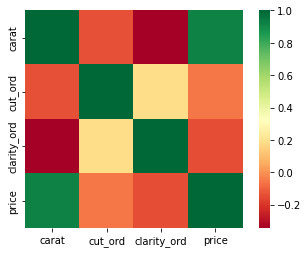

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [ ]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
import numpy as np


# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

input_shape

(3,)

In [ ]:
# Specify the model
model = Sequential()

model.add(Dense(128, activation='relu', input_shape = input_shape,))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 11,121
Trainable params: 11,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Create training and test sets
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.30, random_state= 42)

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_loss = EarlyStopping(monitor = 'val_loss', patience = 5)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_diamonds_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(predictors_train, target_train,
                    epochs = 1000,
                    callbacks = [monitor_val_loss, modelCheckpoint],
                    validation_data = (predictors_test, target_test))

Epoch 1/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 11463453.0000 - val_loss: 2482072.5000
Epoch 2/1000
1094/1094 [==============================] - 2s 2ms/step - loss: 1938133.1250 - val_loss: 1537728.3750
Epoch 3/1000
1094/1094 [==============================] - 2s 2ms/step - loss: 1527701.2500 - val_loss: 1399395.5000
Epoch 4/1000
1094/1094 [==============================] - 2s 2ms/step - loss: 1453191.8750 - val_loss: 1364616.6250
Epoch 5/1000
1094/1094 [==============================] - 2s 2ms/step - loss: 1409910.6250 - val_loss: 1309798.3750
Epoch 6/1000
1094/1094 [==============================] - 2s 2ms/step - loss: 1376546.6250 - val_loss: 1283195.3750
Epoch 7/1000
1094/1094 [==============================] - 2s 2ms/step - loss: 1357826.6250 - val_loss: 1294285.8750
Epoch 8/1000
1094/1094 [==============================] - 2s 2ms/step - loss: 1335770.1250 - val_loss: 1326546.0000
Epoch 9/1000
1094/1094 [==============================] - 2s 2ms/step -

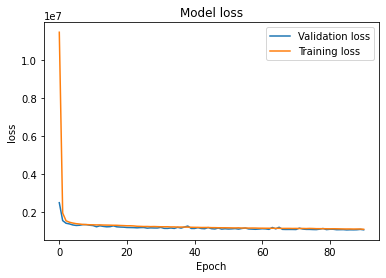

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(h_callback.history['val_loss'], label = 'Validation loss')
plt.plot(h_callback.history['loss'], label= 'Training loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:

from keras.models import load_model

my_model = load_model('best_diamonds_model.hdf5')

In [ ]:
preds = my_model.predict(predictors_test)
preds

array([[5369.937  ],
       [3062.2864 ],
       [1550.7408 ],
       ...,
       [ 615.96063],
       [1862.7834 ],
       [ 803.30444]], dtype=float32)

In [ ]:
target_test

array([6884., 3212., 1424., ...,  696., 1224.,  723.], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

from math import sqrt



mse = mean_squared_error(target_test, preds)


rmse = sqrt(mse)

print('RMSE: %f' % rmse)

RMSE: 1023.784432


Deep learning algorithm with some optimization results in 20,8 % better performance than Linear Regression. 


In [ ]:
from keras.layers import BatchNormalization


# Specify the model
model_b = Sequential()

model_b.add(Dense(128, activation='relu', input_shape = input_shape,))
model_b.add(BatchNormalization())
model_b.add(Dense(64, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Dense(32, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Dense(8, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Dense(1))

In [ ]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               512       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                

In [ ]:
# Create training and test sets
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.30, random_state= 42)

In [ ]:
# Compile the model
model_b.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_loss = EarlyStopping(monitor = 'val_loss', patience = 5)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_diamonds_model_b.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model_b.fit(predictors_train, target_train,
                    epochs = 1000,
                    callbacks = [monitor_val_loss, modelCheckpoint],
                    validation_data = (predictors_test, target_test))

Epoch 1/1000
1094/1094 [==============================] - 4s 3ms/step - loss: 31856708.0000 - val_loss: 29675256.0000
Epoch 2/1000
1094/1094 [==============================] - 3s 3ms/step - loss: 31166192.0000 - val_loss: 28915346.0000
Epoch 3/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 30007094.0000 - val_loss: 27446446.0000
Epoch 4/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 28511360.0000 - val_loss: 25872832.0000
Epoch 5/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 26749022.0000 - val_loss: 23632592.0000
Epoch 6/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 24795374.0000 - val_loss: 22539404.0000
Epoch 7/1000
1094/1094 [==============================] - 3s 3ms/step - loss: 22681048.0000 - val_loss: 20268600.0000
Epoch 8/1000
1094/1094 [==============================] - 3s 3ms/step - loss: 20466664.0000 - val_loss: 17926318.0000
Epoch 9/1000
1094/1094 [==============================] 

In [ ]:
from keras.models import load_model

my_model2 = load_model('best_diamonds_model_b.hdf5')

In [ ]:
preds = my_model2.predict(predictors_test)
preds

array([[5303.8394],
       [3029.9883],
       [1395.98  ],
       ...,
       [ 579.6655],
       [1695.1681],
       [ 980.5603]], dtype=float32)

In [ ]:
target_test

array([6884., 3212., 1424., ...,  696., 1224.,  723.], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

from math import sqrt



mse = mean_squared_error(target_test, preds)


rmse = sqrt(mse)

print('RMSE: %f' % rmse)

RMSE: 1004.566729


# Deep learning with batch optimization performs even better with 24,4 % performance increase than the Linear regression.

## RMSE with Linear Regression, 1328
## RMSE with Deep Learning, 1023.78
## RMSE with Deep Learning and Batch Normalization, 1004.56